## Step 1: Setup

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.6.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 2: Data Preprocessing

In [4]:
dataset = pd.read_csv('/tmp/Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Selecting the Independent and Dependent variables
x = dataset.drop(labels=['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = dataset['Exited']

In [7]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder

In [10]:
label_1 = LabelEncoder()
x['Geography'] = label_1.fit_transform(x['Geography'])

In [11]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
label_2 = LabelEncoder()
x['Gender'] = label_2.fit_transform(x['Gender'])

In [13]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [14]:
# Avoid the dummy variable trap
x = pd.get_dummies(x, drop_first=True, columns=['Geography'])

In [15]:
x.head(8)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0


In [16]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [18]:
x_train


array([[ 0.16958176, -1.09168714, -0.46460796, ...,  1.10643166,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.91601335,  0.30102557, ..., -0.74866447,
         1.75486502, -0.57369368],
       [-1.19119591, -1.09168714, -0.94312892, ...,  1.48533467,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 ,  0.91601335, -0.36890377, ...,  1.41231994,
        -0.5698444 , -0.57369368],
       [-0.62420521, -1.09168714, -0.08179119, ...,  0.84432121,
        -0.5698444 ,  1.74309049],
       [-0.28401079, -1.09168714,  0.87525072, ...,  0.32472465,
         1.75486502, -0.57369368]])

In [19]:
x_test

array([[-0.55204276, -1.09168714, -0.36890377, ...,  1.61085707,
         1.75486502, -0.57369368],
       [-1.31490297, -1.09168714,  0.10961719, ...,  0.49587037,
        -0.5698444 , -0.57369368],
       [ 0.57162971, -1.09168714,  0.30102557, ..., -0.42478674,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227,  0.91601335, -0.27319958, ...,  0.71888467,
        -0.5698444 ,  1.74309049],
       [-0.00566991,  0.91601335, -0.46460796, ..., -1.54507805,
         1.75486502, -0.57369368],
       [-0.79945688,  0.91601335, -0.84742473, ...,  1.61255917,
         1.75486502, -0.57369368]])

## Building the model

In [20]:
# Creating the object (Initializing the ANN)
model = tf.keras.models.Sequential()

In [21]:
# Adding input layer, hidden layer, and output layer
model.add(tf.keras.layers.Dense(units=6, activation='relu', input_dim = 11))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [22]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [24]:
history = model.fit(x_train, y_train.to_numpy(), batch_size=10, epochs=100, validation_data=(x_test, y_test.to_numpy()))

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.5758 - accuracy: 0.7324 - val_loss: 0.4648 - val_accuracy: 0.8035
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4474 - accuracy: 0.8062 - val_loss: 0.4284 - val_accuracy: 0.8120
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4253 - accuracy: 0.8100 - val_loss: 0.4120 - val_accuracy: 0.8205
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4050 - accuracy: 0.8281 - val_loss: 0.3874 - val_accuracy: 0.8410
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3841 - accuracy: 0.8394 - val_loss: 0.3703 - val_accuracy: 0.8530
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3685 - accuracy: 0.8474 - val_loss: 0.3598 - val_accuracy: 0.8525
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3591 - accuracy: 0.8524 - val_loss: 0.3515 - val_accuracy: 0.8540

Epoch 58/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3312 - accuracy: 0.8630 - val_loss: 0.3308 - val_accuracy: 0.8635
Epoch 59/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3314 - accuracy: 0.8634 - val_loss: 0.3308 - val_accuracy: 0.8610
Epoch 60/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3312 - accuracy: 0.8640 - val_loss: 0.3320 - val_accuracy: 0.8580
Epoch 61/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3308 - accuracy: 0.8629 - val_loss: 0.3325 - val_accuracy: 0.8590
Epoch 62/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3310 - accuracy: 0.8641 - val_loss: 0.3323 - val_accuracy: 0.8575
Epoch 63/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3306 - accuracy: 0.8635 - val_loss: 0.3318 - val_accuracy: 0.8595
Epoch 64/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3307 - accuracy: 0.8629 - val_loss: 0.3314 - val_accuracy:

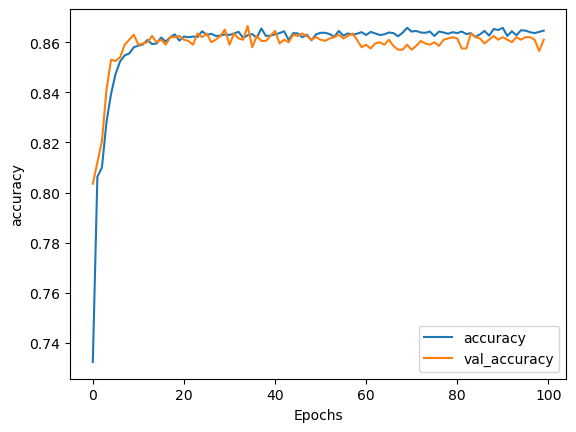

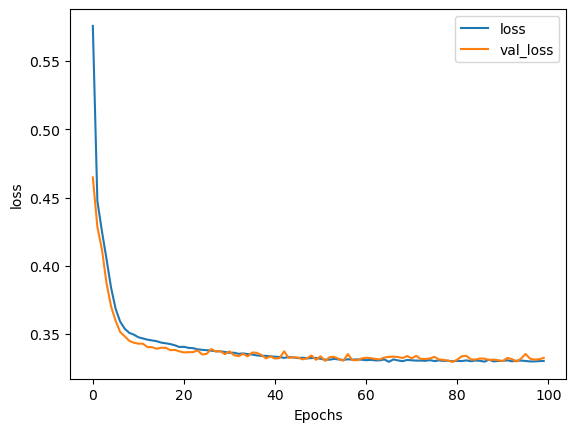

In [25]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Model evaluation and prediction

In [26]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test.to_numpy())

63/63 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8610


In [27]:
print('Test Accuracy: {}'.format(test_acc))

Test Accuracy: 0.8610000014305115


In [28]:
predict_x = model.predict(x_test)

In [37]:
if predict_x[5] > 0.5:
    print("Customer left the bank")
else:
    print("Customer stayed with the bank")

Customer left the bank


In [30]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
predict_x

array([[0.23927897],
       [0.3132111 ],
       [0.12360496],
       [0.09443943],
       [0.06976662],
       [0.99409723],
       [0.03285504],
       [0.06093705],
       [0.33378094],
       [0.9352253 ],
       [0.03012517],
       [0.42538753],
       [0.2848658 ],
       [0.1826799 ],
       [0.7702019 ],
       [0.49691683],
       [0.09097743],
       [0.1397574 ],
       [0.0616385 ],
       [0.13845016],
       [0.4810957 ],
       [0.01876799],
       [0.03679701],
       [0.08052363],
       [0.01541092],
       [0.04778007],
       [0.26437122],
       [0.0317953 ],
       [0.17092991],
       [0.44923422],
       [0.02116365],
       [0.34573916],
       [0.06058935],
       [0.03000071],
       [0.29232985],
       [0.02461805],
       [0.03272223],
       [0.01570059],
       [0.0112143 ],
       [0.15726998],
       [0.12281425],
       [0.3908281 ],
       [0.38215402],
       [0.05330601],
       [0.5293817 ],
       [0.04131366],
       [0.266296  ],
       [0.102